In [ ]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!git clone https://github.com/parthmodi444/AI-AGENT.git

fatal: destination path 'AI-AGENT' already exists and is not an empty directory.


In [ ]:
!git init


Reinitialized existing Git repository in /content/.git/


In [ ]:
!git config --global user.email "modi.parth18@siesgst.ac.in"
!git config --global user.name "parthmodi444"

In [ ]:
!git add gen_ai.ipynb

fatal: pathspec 'gen_ai.ipynb' did not match any files


In [ ]:
!git add .
!git commit -m "first commit"
!git push

error: 'AI-AGENT/' does not have a commit checked out
fatal: adding files failed
On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	AI-AGENT/
	drive/
	file-1LCJn8oEuiPsUiR63p7EoF.png
	file-1MEb3LMK33iz3yVrSWomVQ.png
	file-3Eyg5WQ984C3nzUz8xT8PM.png
	file-5KWMWdkUBFa3TdZ8rHBS9r.png
	file-6fN63TCbopSUXWedZJNFcW.png
	file-95ZqouAXozQjnmxtMVN7kr.png
	file-BCLewDPddwa5ajnJBNzWqE.png
	file-CUaWyodcibonfGgcGQvRhn.png
	file-D9v3LDueBa7sUL9b4Ak8h1.png
	file-ET6idXuBDg6jZoBRFDFjv1.png
	file-FQRP4a3XK1TSS9B5JJ3zEk.png
	file-GNW2YyWmKKRU547iaZy4jP.png
	file-Go8nTfHmJ4d998iXzdyk7L.png
	file-JECmPuachrtygYsFRqJMt9.png
	file-JPtFVDfL7WjgJSTXxyi3zd.png
	file-JiYAJq9DvdvxBvQ8RnjFVk.png
	file-KniSybNpiEa2R3PfJ1xmp3.png
	file-Lt2h3gno49voSjjN52UhF8.png
	file-Mb8XYb3oj4vqVSUL1xkqtt.png
	file-P4H6fYMYZP6MksnKfMme2e.png
	file-QupnSjp9sw1CgBB74Y65J3.png
	file-ReYAF9F3zDaTVsWnMgN9fN.png
	file-SBxftp9Vp6DQoCmpHEkeTq.png
	file-T3aJg1dii

In [ ]:
!pip install openai pandas matplotlib seaborn nltk requests python-dotenv

import os
import json
import time
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from nltk.sentiment import SentimentIntensityAnalyzer
from google.colab import userdata
import nltk

In [ ]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
NEWS_API_KEY = userdata.get('NEWS_API_KEY')
GNEWS_API_KEY=userdata.get('GNEWS_API_KEY')


In [ ]:
from openai import OpenAI

# Initialize OpenAI client
client = OpenAI(api_key=OPENAI_API_KEY)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Set up paths for RAG documents
RAG_FOLDER = "/content/drive/MyDrive/news_aggregator_rag"
os.makedirs(RAG_FOLDER, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
news_analysis_guidelines = """# News Analysis Methodology

## Principles of News Analysis
1. **Verify sources**: Always check the credibility of sources
2. **Cross-reference information**: Confirm facts across multiple outlets
3. **Identify bias**: Recognize potential biases in reporting
4. **Contextual understanding**: Place news in historical and cultural context
5. **Separate fact from opinion**: Distinguish between factual reporting and commentary

## Key Analytical Frameworks
1. **5W1H Analysis**: Who, What, When, Where, Why, and How
2. **SWOT Analysis**: Strengths, Weaknesses, Opportunities, and Threats
3. **Stakeholder Analysis**: Identify who is affected and how
4. **Trend Analysis**: How does this fit into longer-term patterns?
5. **Comparative Analysis**: How does coverage differ across sources?

## Best Practices for News Summarization
1. Prioritize key information over secondary details
2. Maintain objectivity in presentation
3. Include diverse perspectives when available
4. Acknowledge limitations in available information
5. Update analysis when new information emerges

## Sentiment Analysis in News
1. **Positive sentiment**: Language expressing approval, optimism, progress
2. **Negative sentiment**: Language expressing criticism, pessimism, decline
3. **Neutral sentiment**: Factual reporting without evaluative language
4. Recognize that sentiment can vary by topic, source, and audience

## Types of News Bias
1. **Selection bias**: What stories are covered or ignored
2. **Placement bias**: Where stories appear and how much prominence they receive
3. **Source bias**: Which voices and perspectives are included
4. **Tone bias**: Language choices that subtly influence perception
5. **Visual bias**: How images frame the narrative

## Ethical Considerations
1. Respect privacy and dignity of individuals
2. Consider consequences of amplifying certain stories
3. Avoid sensationalism and fearmongering
4. Provide context for potentially misleading statistics
5. Acknowledge unknowns and uncertainties
"""


In [ ]:
with open(f"{RAG_FOLDER}/news_analysis_guidelines.md", "w") as f:
    f.write(news_analysis_guidelines)


In [ ]:
news_sources_info = """# Major News Sources Information

## News Source Profiles

### Reuters
**Political Leaning**: Generally Neutral
**Focus Areas**: Global news, financial markets, business
**Notable For**: Factual reporting with minimal bias
**Founding Year**: 1851
**Headquarters**: London, UK

### Associated Press (AP)
**Political Leaning**: Generally Neutral
**Focus Areas**: Breaking news, national and international coverage
**Notable For**: Widely syndicated content, factual reporting
**Founding Year**: 1846
**Headquarters**: New York City, USA

### BBC
**Political Leaning**: Slightly left of center
**Focus Areas**: Global news, UK news, cultural reporting
**Notable For**: Public broadcasting, international perspective
**Founding Year**: 1922
**Headquarters**: London, UK

### Fox News
**Political Leaning**: Right-leaning
**Focus Areas**: US politics, conservative viewpoints
**Notable For**: Opinion-based shows, conservative commentary
**Founding Year**: 1996
**Headquarters**: New York City, USA

### CNN
**Political Leaning**: Left-leaning
**Focus Areas**: US politics, breaking news, international affairs
**Notable For**: 24-hour news cycle, analysis and commentary
**Founding Year**: 1980
**Headquarters**: Atlanta, USA

### The New York Times
**Political Leaning**: Left-leaning
**Focus Areas**: US politics, international affairs, arts
**Notable For**: In-depth reporting, investigative journalism
**Founding Year**: 1851
**Headquarters**: New York City, USA

### The Wall Street Journal
**Political Leaning**: Center-right (news), Right-leaning (editorial)
**Focus Areas**: Business, finance, US politics
**Notable For**: Financial reporting, business analysis
**Founding Year**: 1889
**Headquarters**: New York City, USA

## Understanding Media Bias Ratings

### How Media Bias Is Evaluated
1. **Content Analysis**: Systematic examination of language, sources, and framing
2. **Source Diversity**: Variety of perspectives included in reporting
3. **Factual Accuracy**: Verification of claims against primary sources
4. **Transparency**: Disclosure of methods, sources, and potential conflicts

### Common Bias Classifications
1. **Left**: Favors liberal/progressive perspectives
2. **Lean Left**: Slight preference for liberal perspectives
3. **Center**: Balanced coverage with minimal bias
4. **Lean Right**: Slight preference for conservative perspectives
5. **Right**: Favors conservative perspectives

### Factors That Influence News Coverage
1. **Ownership Structure**: Corporate vs. independent ownership
2. **Revenue Model**: Subscription vs. advertising-based
3. **Target Audience**: Demographics and political leanings
4. **Editorial Policies**: Guidelines for reporting and fact-checking
5. **Geographic Focus**: Local, national, or international emphasis
"""


In [ ]:
with open(f"{RAG_FOLDER}/news_sources_info.md", "w") as f:
    f.write(news_sources_info)


In [ ]:
def create_vector_store():
    # 1. Create empty vector store
    vector_store = client.vector_stores.create(  # NOT in beta namespace
        name="News Analysis Store",
        chunking_strategy={"type": "auto"}
    )

    # 2. Upload files separately
    file_paths = [
        f"{RAG_FOLDER}/news_analysis_guidelines.md",
        f"{RAG_FOLDER}/news_sources_info.md"
    ]

    # Upload files with assistants purpose
    files = [client.files.create(file=open(path, "rb"), purpose="assistants")
            for path in file_paths]

    # 3. Attach files to vector store
    for file in files:
        client.vector_stores.files.create(  # Direct vector_stores path
            vector_store_id=vector_store.id,
            file_id=file.id
        )

    print(f"Vector store {vector_store.id} ready with {len(files)} files")
    return vector_store.id

# Create vector store
vector_store_id = create_vector_store()

Vector store vs_680d26848efc819184fd8a642df3883b ready with 2 files


In [ ]:
assistant = client.beta.assistants.create(
    name="News Intelligence Aggregator",
    instructions="""You are a sophisticated News Intelligence Aggregator assistant specialized in gathering, analyzing, and presenting news in a thoughtful and insightful manner.

Your capabilities include:
1. Fetching current news headlines and articles from fetch_top_headlines function
(When processing requests:
 Only use get_news_sources if explicitly asked about:
   - News outlet metadata
   - Source availability
   - Media organization details

)
2. Never use get_news_sources for actual news content requests
3. Analyzing news content for trends, sentiment, and patterns
4. Providing context and background for major news stories
5. Comparing coverage across different news sources
6. Generating visualizations of news data
7. Offering balanced perspectives on complex topics
8. If no results found, analyze using available data
9. When analyzing data:
   - Always use Code Interpreter to generate visualizations
   - Create comparative charts for sentiment across sources
   - Show temporal trends when date information is available
   - Include statistical summaries of key metrics
   - Format complex numbers using appropriate units

When analyzing news:
- Always maintain objectivity and avoid political bias
- Consider multiple perspectives on controversial topics
- Verify information across multiple sources when possible
- Distinguish between facts and opinions in your analysis
- Provide context to help users understand the significance of news events
- Be transparent about limitations in available information

Your personality combines the analytical rigor of a seasoned journalist with the contextual understanding of a historian. You are neither sensationalist nor boring - you present information clearly while highlighting truly important developments and patterns.

Use the code interpreter for data analysis, sentiment analysis, and visualization tasks. Use function calls to retrieve fresh news data. Use your knowledge files to apply best practices in news analysis and understand media sources.""",
    model="gpt-3.5-turbo",
    tools=[
        {"type": "file_search"},
        {"type": "code_interpreter"},
        {
            "type": "function",
            "function": {
                "name": "fetch_top_headlines",
                "description": "Fetch top news headlines by country/category",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "country": {"type": "string"},
                        "category": {
                            "type": "string",
                            "enum": ["business", "entertainment", "general", "health", "science", "sports", "technology"]
                        },
                        "query": {"type": "string"},
                        "max": {
                          "type": "integer",
                          "description": "Number of results (1-100)"
                    }
                    },
                    "required": ["country"]
                }
            }
        },
        {
            "type": "function",
            "function": {
                "name": "search_news",
                "description": "Search for news articles by keywords and date range",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "query": {"type": "string"},
                        "from_date": {"type": "string"},
                        "to_date": {"type": "string"},
                        "sort_by": {
                            "type": "string",
                            "enum": ["relevancy", "popularity", "publishedAt"]
                        },
                        "page_size": {"type": "integer"}
                    },
                    "required": ["query"]
                }
            }
        },
        {
            "type": "function",
            "function": {
                "name": "get_news_sources",
                "description": "Get available news sources by country/category",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "country": {"type": "string"},
                        "category": {
                            "type": "string",
                            "enum": ["business", "entertainment", "general", "health", "science", "sports", "technology"]
                        },
                        "language": {"type": "string"}
                    }
                }
            }
        }
    ],
    tool_resources={
        "file_search": {
            "vector_store_ids": [vector_store_id]
        }
    }
)

In [ ]:
def fetch_top_headlines(country='us', category=None, query=None, max=10, lang='en',sources=None):
    """
    Fetch top headlines from GNews API

    Parameters:
        country (str): 2-letter country code (e.g., 'us', 'gb', 'in')
        category (str): Category (e.g., 'business', 'technology', 'sports')
        query (str): Search query
        max_results (int): Number of results to return (1-100)
        lang (str): Language code (e.g., 'en', 'es', 'fr')

    Returns:
        dict: JSON response with headlines
    """
    url = "https://gnews.io/api/v4/top-headlines"

    params = {
        "apikey": GNEWS_API_KEY,
        "country": country,
        "max": max,
        "lang": lang
    }

    if category:
        params["category"] = category

    if query:
        params["q"] = query

    response = requests.get(url, params=params)

    if response.status_code == 200:
        print(f"🌐 Fetched {len(response.json()['articles'])} GNews headlines")
        return response.json()
    else:
        return {"error": f"GNews API failed: {response.text}"}



In [ ]:
def search_news(query, from_date=None, to_date=None, sort_by='publishedAt', page_size=10,sources=None):
    """
    Search for news articles with NewsAPI

    Parameters:
        query (str): Search query
        from_date (str): Start date in format YYYY-MM-DD
        to_date (str): End date in format YYYY-MM-DD
        sort_by (str): How to sort results ('relevancy', 'popularity', 'publishedAt')
        page_size (int): Number of results to return

    Returns:
        dict: JSON response with news articles
    """
    url = "https://newsapi.org/v2/everything"

    # Default dates if none provided
    if not from_date:
        from_date = (datetime.now() - timedelta(days=7)).strftime('%Y-%m-%d')
    if not to_date:
        to_date = datetime.now().strftime('%Y-%m-%d')


    print(f"📆 Actual dates used: {from_date} to {to_date}")


    params = {
        "apiKey": NEWS_API_KEY,
        "q": query,
        "from": from_date,
        "to": to_date,
        "sortBy": sort_by,
        "pageSize": page_size
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        print(f"🔎 Search results for '{query}': {len(response.json()['articles'])} articles")
        return response.json()
    else:
        return {"error": f"API request failed with status code {response.status_code}: {response.text}"}


In [ ]:
def get_news_sources(country=None, category=None, language=None):
    """
    Get available news sources from NewsAPI

    Parameters:
        country (str): Country code (e.g., 'us', 'gb', 'in')
        category (str): Category (e.g., 'business', 'technology', 'sports')
        language (str): Language code (e.g., 'en', 'fr', 'es')

    Returns:
        dict: JSON response with news sources
    """
    url = "https://newsapi.org/v2/sources"

    params = {"apiKey": NEWS_API_KEY}

    if country:
        params["country"] = country

    if category:
        params["category"] = category

    if language:
        params["language"] = language

    response = requests.get(url, params=params)

    if response.status_code == 200:
        return response.json()
    else:
        return {"error": f"API request failed with status code {response.status_code}: {response.text}"}

In [ ]:
tools = [
    {
        "type": "function",
        "function": {
             "name": "fetch_top_headlines",
            "description": "Fetch top news headlines by country/category",
            "parameters": {
                "type": "object",
                "properties": {
                    "country": {"type": "string"},
                    "category": {"type": "string"},
                    "query": {"type": "string"},
                    "max_results": {"type": "integer"},
                    "lang": {"type": "string"}
                }
            }

            }

    },
    {
        "type": "function",
        "function": {
            "name": "search_news",
            "description": "Search for news articles by keywords, date range, and sorting criteria",
            "parameters": {
                "type": "object",
                "properties": {
                    "query": {
                        "type": "string",
                        "description": "Keywords or phrases to search for in articles"
                    },
                    "from_date": {
                        "type": "string",
                        "description": "Start date in format YYYY-MM-DD (defaults to 7 days ago)"
                    },
                    "to_date": {
                        "type": "string",
                        "description": "End date in format YYYY-MM-DD (defaults to today)"
                    },
                    "sort_by": {
                        "type": "string",
                        "enum": ["relevancy", "popularity", "publishedAt"],
                        "description": "How to sort the articles"
                    },
                    "page_size": {
                        "type": "integer",
                        "description": "Number of results to return (default: 10, max: 100)"
                    }
                },
                "required": ["query"]
            }
        }
    },
    {
        "type": "function",
        "function": {
            "name": "get_news_sources",
            "description": "Get available news sources by country, category, or language",
            "parameters": {
                "type": "object",
                "properties": {
                    "country": {
                        "type": "string",
                        "description": "The 2-letter ISO 3166-1 code of the country (e.g., 'us', 'gb', 'in')"
                    },
                    "category": {
                        "type": "string",
                        "enum": ["business", "entertainment", "general", "health", "science", "sports", "technology"],
                        "description": "The category of news sources"
                    },
                    "language": {
                        "type": "string",
                        "description": "The 2-letter ISO 639-1 code of the language (e.g., 'en', 'fr', 'es')"
                    }
                }
            }
        }
    }
]

# Step 7: Create the assistant
# First, upload the RAG files we created
file_ids = []

In [ ]:
thread = client.beta.threads.create()


In [ ]:
import uuid
chart_id = str(uuid.uuid4())[:8]
trend_id = str(uuid.uuid4())[:8]

def process_tool_calls(run, thread_id):


    tool_calls = run.required_action.submit_tool_outputs.tool_calls
    tool_outputs = []

    for tool_call in tool_calls:
        function_name = tool_call.function.name
        function_args = json.loads(tool_call.function.arguments)

        print(f"🔧 Calling {function_name} with args: {function_args}")


        output = None
        if function_name == "fetch_top_headlines":
            output = fetch_top_headlines(**function_args)
            if 'articles' in output:
                print(f"🗞️ Retrieved {len(output['articles'])} articles")
        elif function_name == "search_news":
            output = search_news(**function_args)
            if 'articles' in output:
                print(f"🔍 Found {len(output['articles'])} articles for query: '{function_args['query']}'")
        elif function_name == "get_news_sources":
            output = get_news_sources(**function_args)
            if 'sources' in output:
                print(f"📰 Found {len(output['sources'])} sources with params: {function_args}")


        if function_name in ["fetch_top_headlines", "search_news"] and 'articles' in output:
            articles = output['articles']

            # Create DataFrame for analysis
            df = pd.DataFrame([{
                'title': a.get('title'),
                'source': a.get('source', {}).get('name'),
                'content': a.get('content') or a.get('description') or "",
                'publishedAt': a.get('publishedAt')
            } for a in articles])

            # Perform sentiment analysis
            sia = SentimentIntensityAnalyzer()
            df['sentiment'] = df['content'].apply(
                lambda x: sia.polarity_scores(str(x))['compound'])

            # Generate visualization
            plt.figure(figsize=(12, 6))
            sns.barplot(x='source', y='sentiment', data=df)
            plt.title(f"Sentiment Analysis by Source\n{function_args.get('query', '')}")
            plt.xticks(rotation=45)
            plt.tight_layout()

            # Save and upload visualization
            chart_path = f"/content/sentiment_{chart_id}.png"
            plt.savefig(chart_path)
            plt.close()

            # Upload to OpenAI
            chart_file = client.files.create(
                file=open(chart_path, "rb"),
                purpose="assistants"
            )

            # Store reference for assistant
            output['analysis_chart'] = chart_file.id

            if 'publishedAt' in df.columns:
              df['date'] = pd.to_datetime(df['publishedAt']).dt.date
              daily_sentiment = df.groupby('date')['sentiment'].mean()

            if len(daily_sentiment) <= 1:
              print("Not enough temporal data for trend analysis") # Only plot trends with 2+ data points
            else:


              plt.figure(figsize=(12, 6))
              daily_sentiment.plot(kind='line', marker='o')
              plt.title("Sentiment Trend Over Time")
              plt.ylabel("Average Sentiment Score")

              trend_path = f"/content/trend_{trend_id}.png"
              plt.savefig(trend_path)
              plt.close()

              trend_file = client.files.create(
              file=open(trend_path, "rb"),
              purpose="assistants"
              )
              output['trend_chart'] = trend_file.id


        tool_outputs.append({
            "tool_call_id": tool_call.id,
            "output": json.dumps(output)
        })

    # Submit outputs back to the assistant
    return client.beta.threads.runs.submit_tool_outputs(
        thread_id=thread_id,
        run_id=run.id,
        tool_outputs=tool_outputs
    )



In [ ]:
def chat_with_assistant(user_message):
    # Add the user's message to the thread
    client.beta.threads.messages.create(
        thread_id=thread.id,
        role="user",
        content=user_message
    )

    # Create a run
    run = client.beta.threads.runs.create(
        thread_id=thread.id,
        assistant_id=assistant.id
    )

    # Poll for the run to complete
    while True:
        run = client.beta.threads.runs.retrieve(
            thread_id=thread.id,
            run_id=run.id
        )

        if run.status == "completed":
            print("Run completed")
            break
        elif run.status == "requires_action":
            print("Run requires action")
            run = process_tool_calls(run, thread.id)
        elif run.status in ["failed", "cancelled", "expired"]:
            print(f"Run ended with status: {run.status}")
            break

        time.sleep(1)

    #rag_keywords = ["media bias", "source profile", "editorial policy"]
    #visualization_extensions = [".png", ".jpg", ".chart"]

    # Get messages (newest first)
    messages = client.beta.threads.messages.list(
        thread_id=thread.id
    )

    # Return the latest assistant message
    # for message in messages.data:
    #     if message.role == "assistant":
    #         for content_block in message.content:
    #             # Check for RAG usage
    #             if any(keyword in content_block.text.value.lower()
    #                    for keyword in rag_keywords):
    #                 print("\n📚 RAG Context Used: Media bias profiles")

    #             # Check for visualizations
    #             if hasattr(content_block, 'file_id'):
    #                 print(f"\n📈 Visualization Generated: {content_block.file_id}")

    #         return message.content


    # for message in messages.data:
    #   if message.role == "assistant":
    #     return message.content


    for message in messages.data:
        if message.role == "assistant":
            for content_block in message.content:
                if content_block.type == "image_file":
                    print("**********************")
                    # Retrieve and display image
                    file_id = content_block.image_file.file_id
                    file_content = client.files.content(file_id)
                    img_path = f"/content/{file_id}.png"
                    with open(img_path, "wb") as f:
                        f.write(file_content.read())

                    # Display in Colab
                    # from IPython.display import Image
                    # display(Image(filename=img_path))
        return message.content


In [ ]:
def demonstrate_assistant():
    print("=== News Intelligence Aggregator Demo ===\n")

    # Example 1: Get top headlines
    print("Example 1: Getting top technology headlines")
    response = chat_with_assistant("What are the top technology headlines today?")
    for content_block in response:
        if hasattr(content_block, 'text'):
            print(content_block.text.value)
    print("\n" + "-"*50 + "\n")

    # Example 2: Analyze a specific news topic
    print("Example 2: Analyzing coverage of a major news topic")
    response = chat_with_assistant("Can you analyze recent news about climate change and show me the sentiment trends?")
    for content_block in response:
        if hasattr(content_block, 'text'):
            print(content_block.text.value)
    print("\n" + "-"*50 + "\n")

    # Example 3: Compare news sources
    print("Example 3: Comparing coverage across news sources")
    response = chat_with_assistant("Compare how CNN and Fox News are covering the latest political developments.")
    for content_block in response:
        if hasattr(content_block, 'text'):
            print(content_block.text.value)
    print("\n" + "-"*50 + "\n")

# Run the demonstration


In [ ]:
from IPython.display import display, Image

def display_image(file_id):
    """Download and display image from OpenAI file ID"""
    try:
        # Retrieve file content
        file_content = client.files.content(file_id)

        # Create local path
        img_path = f"/content/{file_id}.png"

        # Save file
        with open(img_path, "wb") as f:
            f.write(file_content.read())

        # Display in Colab
        display(Image(filename=img_path))

    except Exception as e:
        print(f"🚨 Error displaying image: {str(e)}")

In [ ]:
def interactive_chat():
    print("Welcome to News Intelligence Aggregator!")
    print("Type 'exit' to end the conversation\n")

    while True:
        print("You:")
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            break

        print("\nThinking...")
        response = chat_with_assistant(user_input)

        print("\nAssistant:")
        for content_block in response:
            if content_block.type == "text":
                print(content_block.text.value)
            elif content_block.type == "image_file":
                print("Helllo",content_block.image_file.file_id)
                display_image(content_block.image_file.file_id)


In [ ]:
def demo_sentiment_analysis():
    """Demonstrate sentiment analysis across different news sources"""
    prompt = """Analyze the sentiment of recent news about artificial intelligence from different sources.
    Show me which sources are more positive or negative, and create a visualization of the sentiment differences."""

    print("Demonstrating sentiment analysis capability...\n")
    print(f"Query: {prompt}\n")

    response = chat_with_assistant(prompt)
    for content_block in response:
        if hasattr(content_block, 'text'):
            print(content_block.text.value)

def demo_topic_tracking():
    """Demonstrate tracking a news topic over time"""
    prompt = """Track how news coverage of Ukraine has evolved over the past week.
    Can you identify any significant shifts in focus or tone? Create a visualization showing the main subtopics."""

    print("Demonstrating topic tracking capability...\n")
    print(f"Query: {prompt}\n")

    response = chat_with_assistant(prompt)
    for content_block in response:
        if hasattr(content_block, 'text'):
            print(content_block.text.value)

def demo_source_comparison():
    """Demonstrate comparing news sources"""
    prompt = """Find news about the economy from both left-leaning and right-leaning sources.
    Compare their coverage and highlight the key differences in how they frame economic issues."""

    print("Demonstrating news source comparison...\n")
    print(f"Query: {prompt}\n")

    response = chat_with_assistant(prompt)
    for content_block in response:
        if hasattr(content_block, 'text'):
            print(content_block.text.value)


In [ ]:
print(f"Assistant ID: {assistant.id}")
print(f"Thread ID: {thread.id}")
print("RAG File IDs:", file_ids)
print("\nYour News Intelligence Aggregator is ready to use!")
print("To start using it, run the interactive_chat() function or try one of the demo functions.")

Assistant ID: asst_rpZUzxR9Hhh6sW78w4MzNNRy
Thread ID: thread_iLJQ0OVXH1YCFPOhb5j052tR
RAG File IDs: []

Your News Intelligence Aggregator is ready to use!
To start using it, run the interactive_chat() function or try one of the demo functions.


In [ ]:
def log_visualization(code):
    """Helper to log code interpreter activities"""
    visualization_triggers = [
        "plt.show()",
        "sns.heatmap",
        "ax.plot(",
        "fig.savefig"
    ]

    if any(trigger in code for trigger in visualization_triggers):
        print(f"\n📊 Visualization Code:\n{code}")

Welcome to News Intelligence Aggregator!
Type 'exit' to end the conversation

You:

Thinking...
Run requires action
🔧 Calling search_news with args: {'query': 'tech sentiment', 'from_date': '2022-01-01', 'to_date': '2022-12-31', 'page_size': 5}
📆 Actual dates used: 2022-01-01 to 2022-12-31
🔧 Calling search_news with args: {'query': 'tech sentiment India', 'from_date': '2022-01-01', 'to_date': '2022-12-31', 'page_size': 5}
📆 Actual dates used: 2022-01-01 to 2022-12-31
Run completed

Assistant:
It seems that we are unable to fetch news articles for the specified time range due to limitations in the available news coverage. However, based on the methodologies and best practices for news analysis provided in the files, I can offer some insights based on general trends and recent knowledge.

In tech sentiment trends:
- The US is often a key driver of tech innovation and investment, with Silicon Valley being a global hub for technology companies and startups.
- India is known for its growing

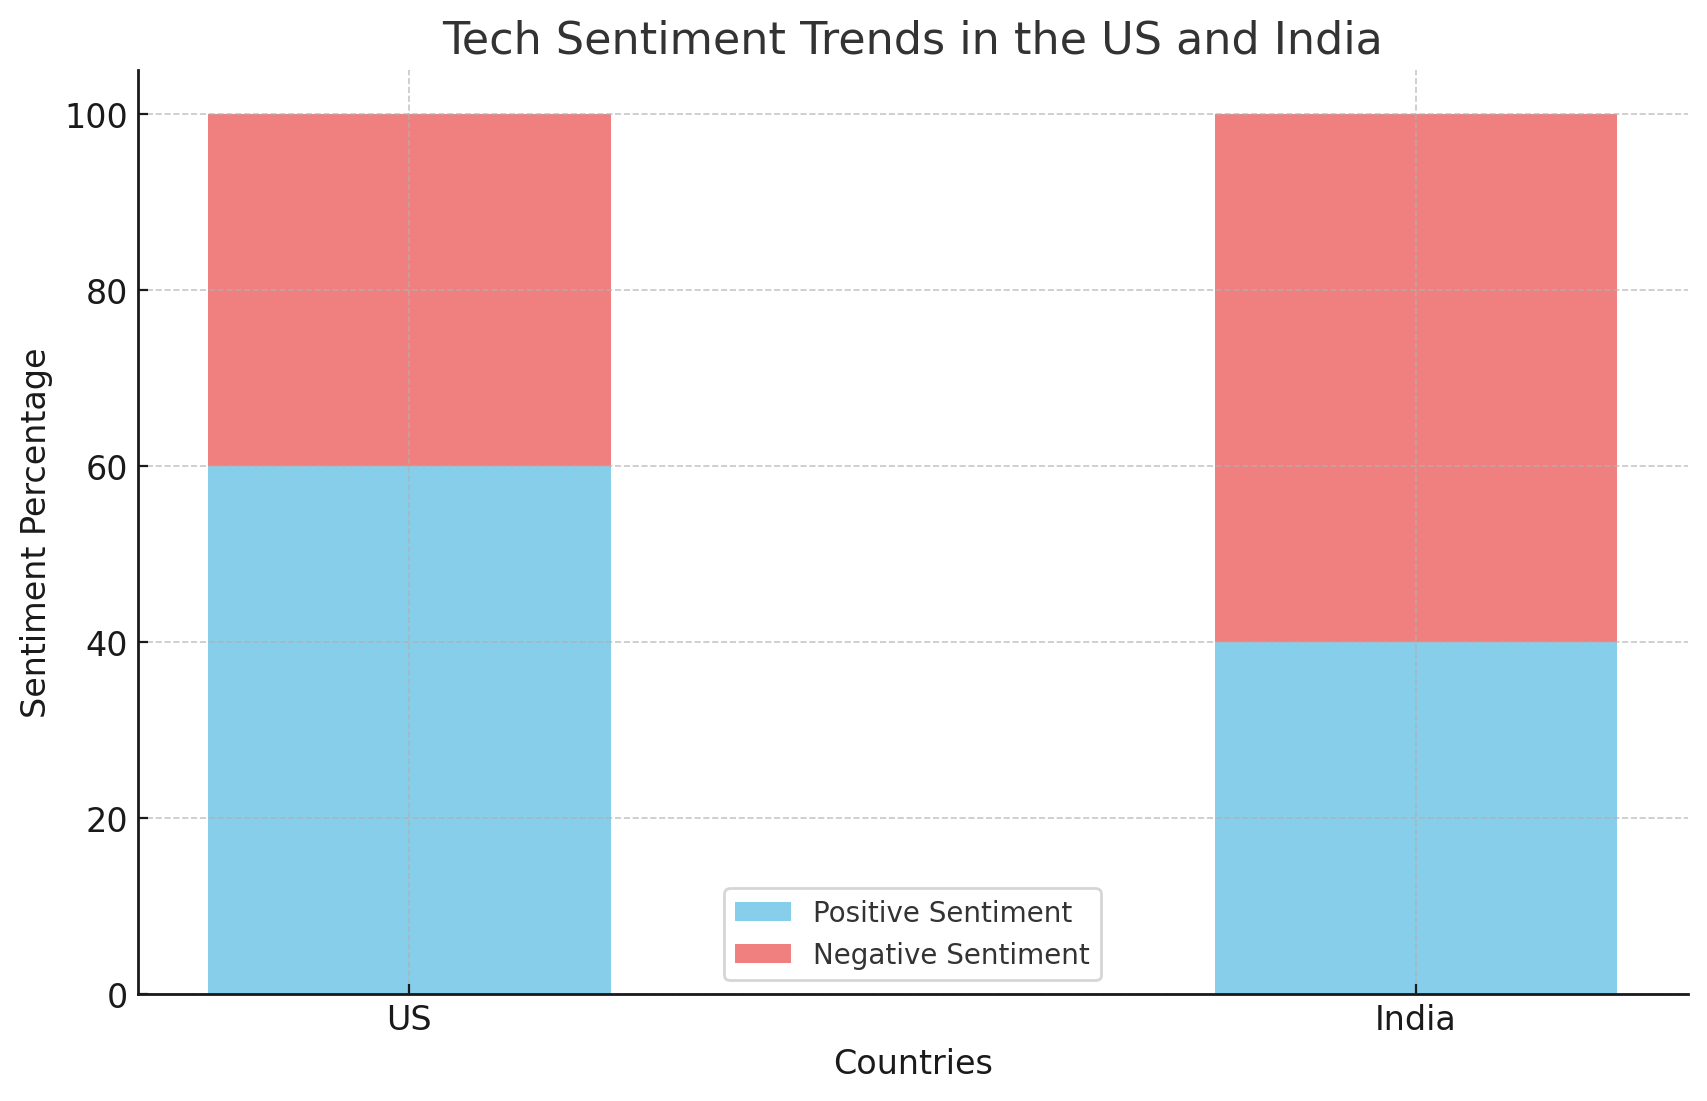

Here is a comparative chart illustrating the tech sentiment trends in the US and India based on placeholder data. The chart shows the percentage distribution of positive and negative sentiments in the tech sector for both countries.

This visualization is based on general trends and placeholder data. For a more accurate analysis, detailed news articles and sentiment analysis would be required. If you have any specific data or topics you would like to explore further, feel free to let me know.
You:

Thinking...
Run completed

Assistant:
I'm glad you found the visualization helpful! If you have any more questions or need further analysis in the future, feel free to reach out. Have a great day!
You:

Thinking...
Run completed

Assistant:
Dublin is the capital and largest city of Ireland, known for its rich history, vibrant culture, and friendly locals. Here are some key points about Dublin that might be useful as you prepare to move there:

1. **Location and Climate**:
   - Dublin is loca

In [ ]:
interactive_chat()